# Свертка изображений

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

## Загрузка изображения

Загрузим любое изображение из интернета. 

In [2]:
!wget https://www.morningagclips.com/wp-content/uploads/2019/10/16071290737_5cc8a52330_c-720x400.jpg

--2021-07-09 18:24:27--  https://www.morningagclips.com/wp-content/uploads/2019/10/16071290737_5cc8a52330_c-720x400.jpg
Resolving www.morningagclips.com... 192.252.157.103
Connecting to www.morningagclips.com|192.252.157.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347542 (339K) [image/jpeg]
Saving to: '16071290737_5cc8a52330_c-720x400.jpg.2'

16071290737_5cc8a52 100%[===================>] 339.40K   614KB/s    in 0.6s    

2021-07-09 18:24:28 (614 KB/s) - '16071290737_5cc8a52330_c-720x400.jpg.2' saved [347542/347542]



## Чтение изображения

In [3]:
#!pip install Pillow

In [4]:
from PIL import Image
img = Image.open("16071290737_5cc8a52330_c-720x400.jpg")

In [5]:
print(img.format, img.size, img.mode)

JPEG (720, 400) RGB


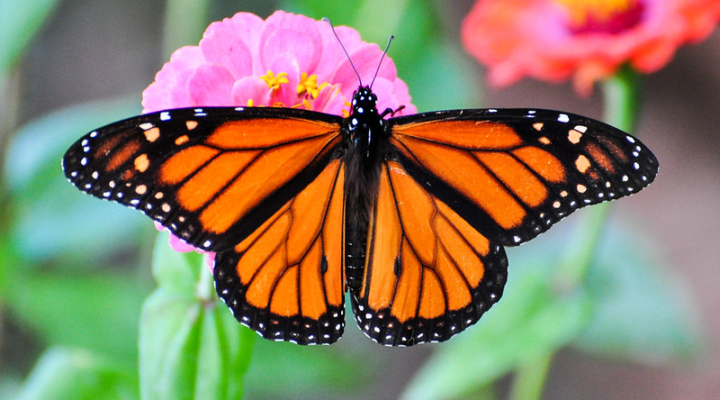

In [6]:
img

## Матричное представление изображения

Мы знаем, что цветное изображение состоит из 3 числовых матриц или трехмерного тензора. Каждая матрица соответствует одному из 3 базовых цветов: красному, зеленому и синему.

In [7]:
# получаем тензор
img_matrix = np.array(img)

#(высота, ширина, каналы)
img_matrix.shape

(400, 720, 3)

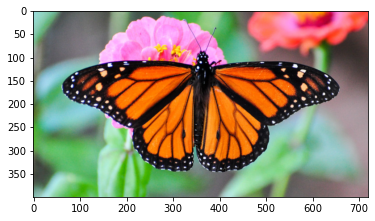

In [8]:
plt.imshow(img_matrix)
plt.show()

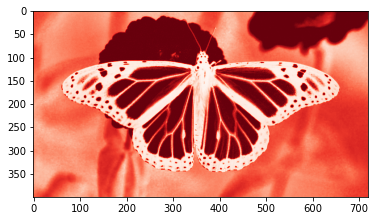

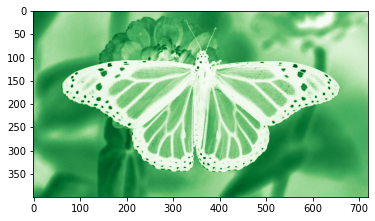

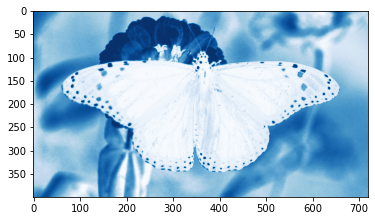

In [9]:
plt.imshow(img_matrix[:, :, 0], cmap=cm.Reds)
plt.show()

plt.imshow(img_matrix[:, :, 1], cmap=cm.Greens)
plt.show()

plt.imshow(img_matrix[:, :, 2], cmap=cm.Blues)
plt.show()

# Свертка изображения

Применим оператор Собеля для детектирования границ на изображении.

In [10]:
import torch
from torch.nn.functional import conv2d

Конвертируем изображение в нужный формат для PyTorch

In [11]:
img_tensor = torch.tensor([img_matrix], dtype=torch.float)
img_tensor.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 400, 720, 3])

In [12]:
img_tensor = img_tensor.permute(0, 3, 1, 2)
img_tensor.size() #(число изображений, число каналов, высота, ширина)

torch.Size([1, 3, 400, 720])

Зададим оператор Собеля для детектирования горизонтальных границ

In [13]:
sobel_hor = [[-1, -2, -1], 
             [ 0,  0,  0], 
             [ 1,  2,  1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_hor, sobel_hor, sobel_hor]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [14]:
img_conv_hor = conv2d(img_tensor, kernel)

img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 398, 718, 1])

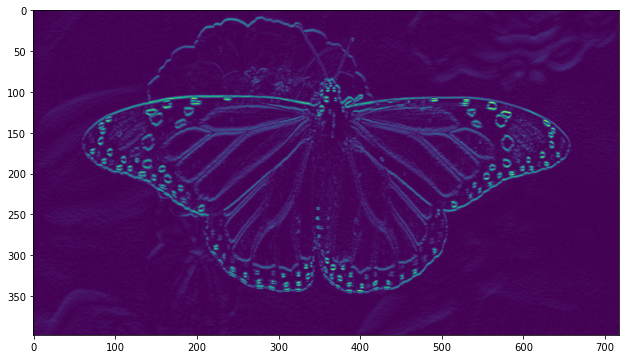

In [15]:
plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(torch.abs(img_conv_hor[0]))
plt.show()

Зададим оператор Собеля для детектирования вертикальных границ

In [16]:
sobel_ver = [[-1, 0, 1], 
             [-2, 0, 2], 
             [-1, 0, 1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_ver, sobel_ver, sobel_ver]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [17]:
img_conv_ver = conv2d(img_tensor, kernel)

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)
img_conv_ver.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 398, 718, 1])

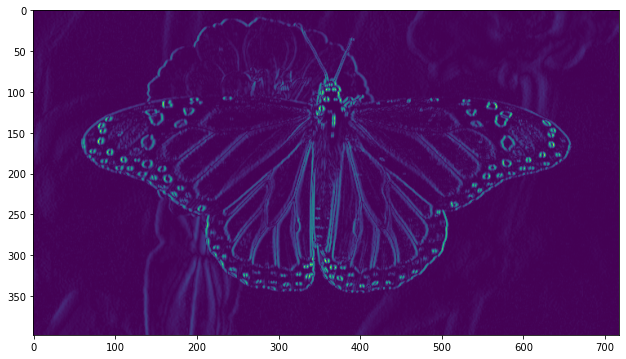

In [18]:
plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(torch.abs(img_conv_ver[0]))
plt.show()

Объединим два изображения

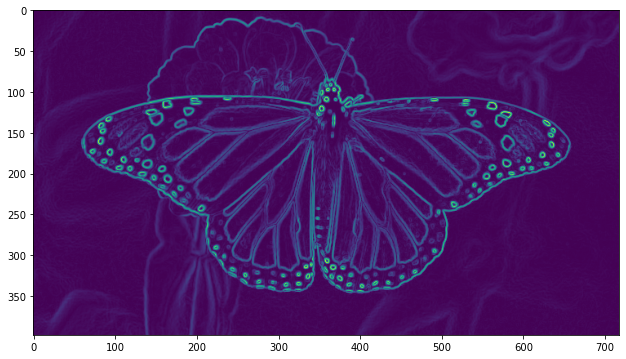

In [19]:
img_conv = torch.sqrt(img_conv_ver**2 + img_conv_hor**2)

plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(img_conv[0])
plt.show()